## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kruskal, mannwhitneyu
import json
from typing import Dict, List

In [3]:
# Set style for consistent plots
plt.style.use('default')
sns.set_palette("husl")

In [4]:
# Load results data
results_df = pd.read_csv('route_opt_results.csv')

## Number of instances

    - 5 methods and 100 instances therefore 500 overall

In [8]:
len(results_df)

500

## Solutions that abide by constraints

    - Simulated annealing has a large proportion of invalid solutions.

In [9]:
len(results_df.loc[results_df['valid']==1])

405

## Approach Overview
- Description of your algorithmic strategy and reasoning, including all approaches considered

## Solving Methods

Greedy: A nearest-neighbor greedy heuristic that starts from a chosen start point and repeatedly visits the closest unvisited goal, subject to length and point constraints. This simple heuristic adds the nearest goal if it does not prevent reaching any end point within the total length limit.

```plaintext
Solution Summary:
Total goal points visited: 547
Total instances solved: 100
Average goals per instance: 5.47
Total runtime (wall time): 0.13s
Average time per instance: 0.000s
```

Beam Search: A limited-width search that keeps only the top W partial paths at each step. At each extension step, we expand all current beams by adding one more goal and then prune to the best W candidates, balancing exploration and efficiency (geeksforgeeks.org).

```plaintext
Solution Summary:
Total goal points visited: 699
Total instances solved: 100
Average goals per instance: 6.99
Total runtime (wall time): 0.28s
Average time per instance: 0.005s
```

Simulated Annealing: A stochastic optimization that starts from an initial solution (we use greedy) and makes random local modifications (e.g. 2-opt swaps or adding a goal). Worse solutions can be accepted with a probability that decreases as a “temperature” cools, allowing escape from local optima. We iteratively update the path to maximize goal count (primary) and minimize length (secondary), following standard simulated annealing techniques (geeksforgeeks.org).

```plaintext
Solution Summary:
Total goal points visited: 1470
Total instances solved: 100
Average goals per instance: 14.70
Total runtime (wall time): 0.51s
Average time per instance: 0.036s
```

Local Search (2-Opt): Starting from a greedy solution, we apply the 2-opt swap repeatedly: this cuts two edges and reconnects in the alternate way to reduce total length. The 2-opt algorithm iterates until no further improvement is found, refining the path by removing crossing or long segments (slowandsteadybrain.medium.com).

```plaintext
Solution Summary:
Total goal points visited: 547
Total instances solved: 100
Average goals per instance: 5.47
Total runtime (wall time): 0.13s
Average time per instance: 0.002s
```

Hybrid: A combination of greedy followed by local 2-opt. We first run the greedy heuristic, then apply the 2-opt improvement on that path. This hybrid approach leverages greedy construction and local refinement.

```plaintext
Solution Summary:
Total goal points visited: 547
Total instances solved: 100
Average goals per instance: 5.47
Total runtime (wall time): 0.13s
Average time per instance: 0.002s
```

## Implementation Details
- Key components of your solution

### 2-opt is a classic local search technique:

    2-opt removes two edges from the path and reconnects the two path segments in the opposite order.

    This effectively reverses the order of the nodes between those two edges.

    If the new route is shorter (and still valid under constraints), we accept it.

    The process is repeated until no further improvement is found.

## Performance Analysis
- Runtime analysis across different instance types and sizes

Tuning parameters for the different approaches

## Beam approach

Beam width: started at standard value 5, increasing this improves the number of global points reached, this also increases the computation time.

alpha: not much change going from 0.001 to 0.1

## Results Summary
- Final performance metrics and insights gained

## Visualizations
- Any relevant graphs or charts that illustrate your findings

In [31]:
len(results_df.loc[results_df['method']=='annealing'])

100

In [30]:
results_df.loc[results_df['method']=='annealing']['valid'].sum()

np.int64(5)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'greedy'),
  Text(1, 0, 'hybrid'),
  Text(2, 0, 'local'),
  Text(3, 0, 'beam'),
  Text(4, 0, 'annealing')])

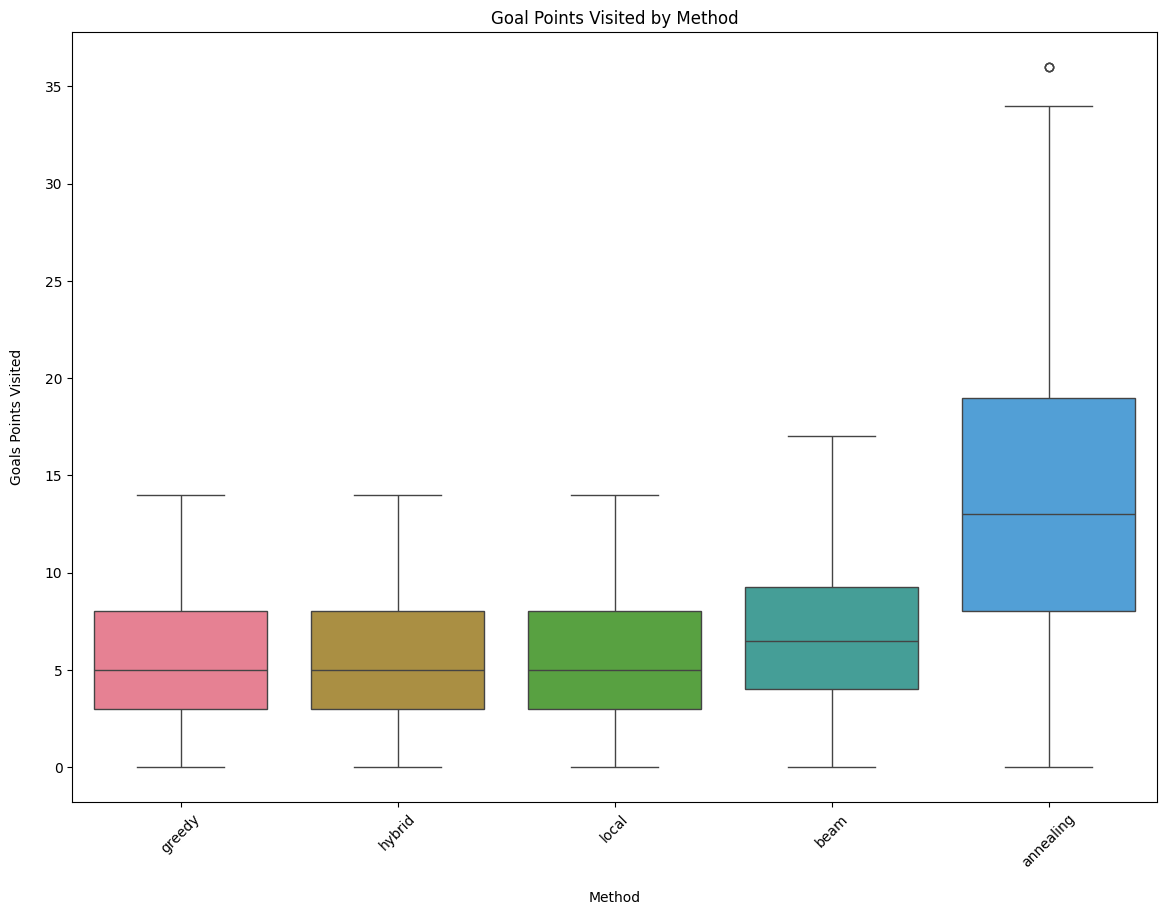

In [27]:
# Goals visited comparison (Box plot)
plt.figure(figsize=(14, 10))
sns.boxplot(data=results_df, x='method', y='goals_visited', hue='method')
plt.title('Goal Points Visited by Method')
plt.xlabel('Method', labelpad = 15)
plt.ylabel('Goals Points Visited', labelpad = 15)
plt.xticks(rotation=45)